
# Exponential Smoothing 

* Use this data for Exponential Smoothing (single, Double, Triple). Take the smoothing parameter as: alpha=0.2, beta=0.1, gamma=0.4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab3\\Daily_Temperature.csv")
df

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8
...,...,...
3645,27-12-1990,14.0
3646,28-12-1990,13.6
3647,29-12-1990,13.5
3648,30-12-1990,15.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [4]:
# Central tendancy of the data
print(f'The Mean : {df.Temp.mean()}')
print(f'The standard deviation : {df.Temp.std()}')

The Mean : 11.177753424657539
The standard deviation : 4.07183689939719


* Converting date into time format

In [5]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
print(f'Min date : {df.Date.min()}')  
print(f'Max date : {df.Date.max()}') 

Min date : 1981-01-01 00:00:00
Max date : 1990-12-31 00:00:00


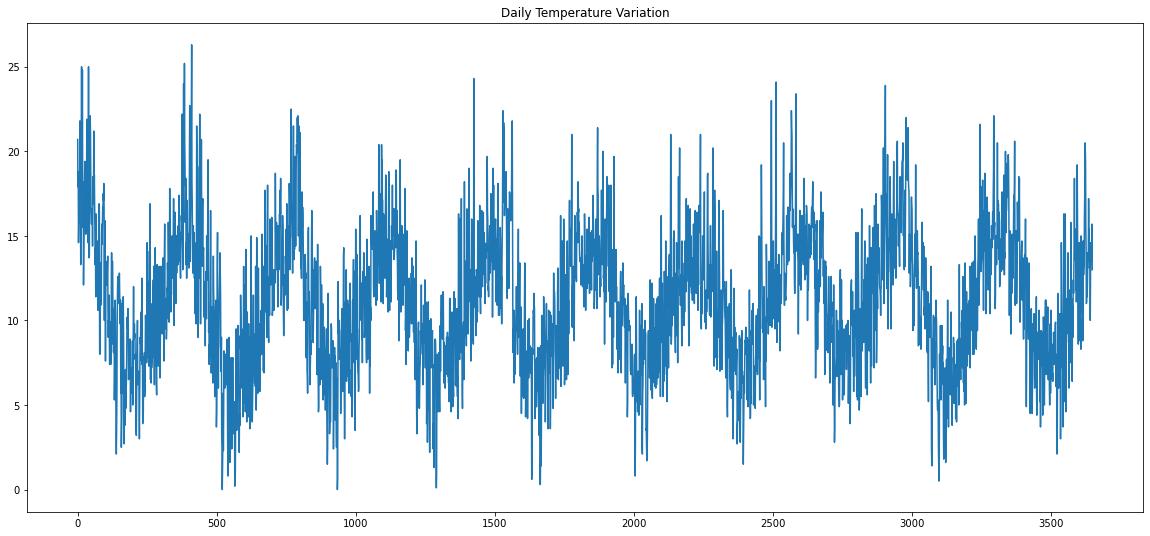

In [6]:
# Plot the value to get the characteristic of the serie
plt.figure(figsize=(20,9))
plt.title('Daily Temperature Variation')
plt.plot(range(len(df.index)), df.Temp)

In [7]:
df

,Date,Temp,year,month
0,1981-01-01,20.7,1981,1
1,1981-01-02,17.9,1981,1
2,1981-01-03,18.8,1981,1
3,1981-01-04,14.6,1981,1
4,1981-01-05,15.8,1981,1
...,...,...,...,...
3645,1990-12-27,14.0,1990,12
3646,1990-12-28,13.6,1990,12
3647,1990-12-29,13.5,1990,12
3648,1990-12-30,15.7,1990,12


* we can find yearly seasonality in the data

In [8]:
# Yearly average temperature plot
plt.figure(figsize=(10, 6))
df1 = df.copy()
y_df = df1.groupby(by=['year', 'month']).mean() # This gives multilevel index

<Figure size 720x432 with 0 Axes>

In [9]:
# Extract the monthly average temparature for each year 
List = []
for i in range(df.year.min(), df.year.max()+1):
    List.append(y_df.loc[i, 'Temp'])
total = []    
for i in List:
    total.extend(i)
total = zip(range(1,len(total)+1), total)
new_data = pd.DataFrame(total, columns=['Months', 'Average_Month_Temp'])


In [11]:
total

In [12]:
new_data

,Months,Average_Month_Temp
0,1,17.712903
1,2,17.678571
2,3,13.500000
3,4,12.356667
4,5,9.490323
...,...,...
115,116,7.825806
116,117,9.166667
117,118,11.345161
118,119,12.656667


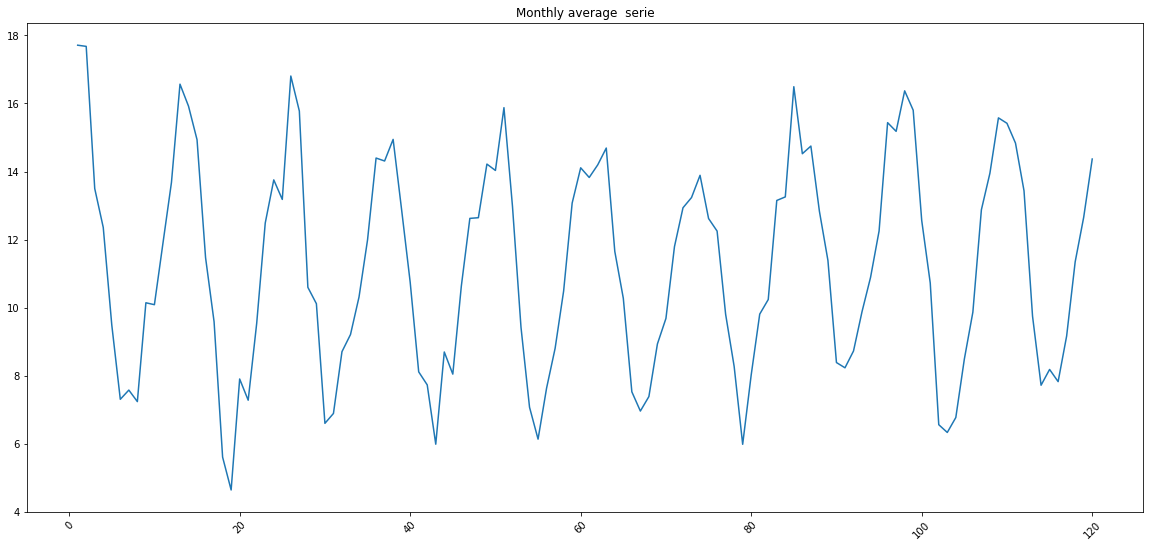

In [10]:
# Plot the monthly average temperature for each year
plt.figure(figsize=(20,9))
plt.title('Monthly average  serie')
plt.plot(new_data.Months, new_data.Average_Month_Temp)
plt.xticks(rotation=45)
plt.show()

In [11]:
# Set Date as index
df.set_index('Date', inplace=True)
df 

,Temp,year,month
Date,,,
1981-01-01,20.7,1981,1
1981-01-02,17.9,1981,1
1981-01-03,18.8,1981,1
1981-01-04,14.6,1981,1
1981-01-05,15.8,1981,1
...,...,...,...
1990-12-27,14.0,1990,12
1990-12-28,13.6,1990,12
1990-12-29,13.5,1990,12


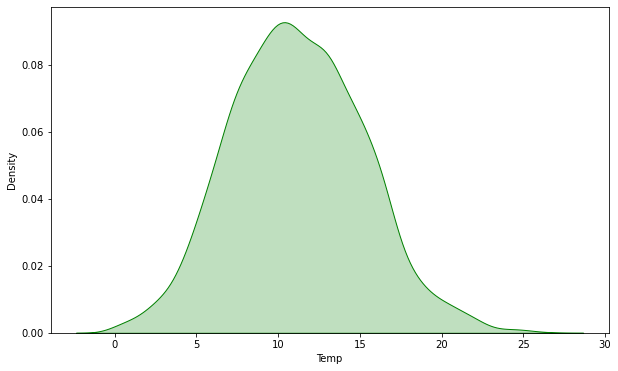

In [12]:
### distribution plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df.Temp, shade=True, color='green')
plt.show() 

* Average

In [14]:
def average(series):
    return np.mean(series)


series = df['Temp']
average(series)

11.177753424657539

* Moving Average

In [15]:
def moving_average(series, n):
    return np.mean(series[-n:])

moving_average(series,1)

13.0

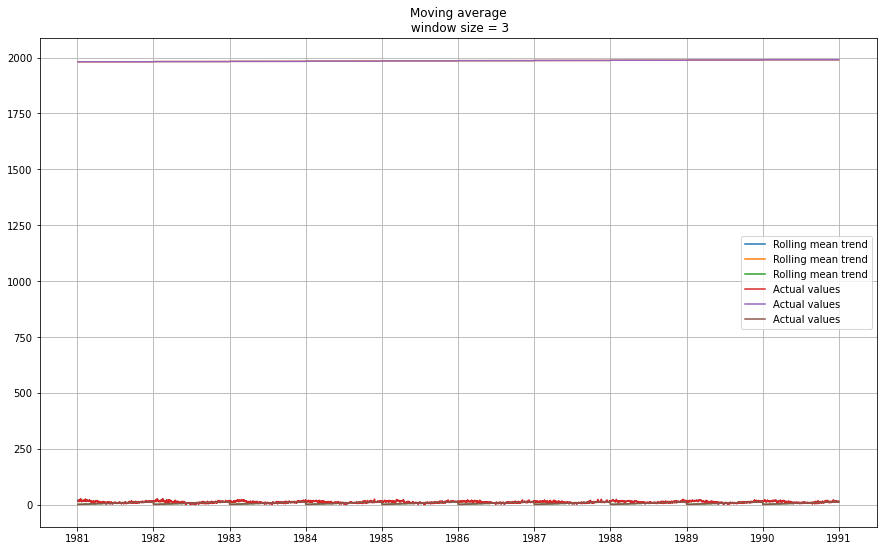

In [16]:
def plot_moving_avg(series, window):
    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(15,9))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, label='Rolling mean trend')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

plot_moving_avg(df, window=3)

### Exponential Smoothing

#### Simple Exponential Smoothing

* A weighted moving average is a moving average where within the sliding window values are given different weights, typically so that more recent points matter more. Instead of only weighting the time series' last  k  values, however, we could instead consider all of the data points, while assigning exponentially smaller weights as we go back in time. This method is so called EXPONENTIAL SMOOTHING.


* y^x=α⋅yx+(1−α)⋅y^x−1


* We can think of  α  as the smoothing factor or memory decay rate, it defines how quickly we will "forget" the last available true observation. The smaller  α  is, the more influence the previous observations have and the smoother the series is. In other words, the higher the  α , the faster the method "forgets" about the past.

In [46]:
# Here we have yearly seasonality
alpha= .2
single_data = new_data.copy()
forecast_values = [0]
for i in single_data.index:
    if i==0:
        forecast_values.append(single_data.Average_Month_Temp[0])
    else:
        temp = forecast_values[-1]
        forecast_values.append(alpha  * single_data.Average_Month_Temp[i] + (1 - alpha) * temp)

# Assume k = 4, let find the forecast values for the next year.
k = 4
values = [forecast_values[-1]]
for i in range(k):
    temp = values[-1]
    values.append(alpha  * single_data.Average_Month_Temp.values[-1] + (1 - alpha) * temp)
    
forecast_values.extend(values[1:])

df = {'Months':np.arange(121, 126),
      'Average_Month_Temp':np.zeros(5)}
frame = pd.DataFrame(df, index=range(1,6))
single_data = pd.concat([single_data, frame])
single_data['Forecast'] = forecast_values

# Compute the error
single_data['Error'] = single_data.Forecast - single_data.Average_Month_Temp

In [47]:
# Compute the root mean square from scratch
var = sum(list(map(lambda x : x**2, single_data['Error'].values[1:121])))
single_RSME = np.sqrt(var/120)
print(f'The Root Mean Square error is : {np.round(single_RSME, 3)}')


# Using library to compute the root mean square
from sklearn.metrics import mean_squared_error
from math import sqrt
X = single_data['Forecast'].values[1:121]
Y = single_data['Average_Month_Temp'].values[1:121]
rms = sqrt(mean_squared_error(X, Y))
print('The Root mean square Using Library :',np.round(rms, 3))

The Root Mean Square error is : 3.424
The Root mean square Using Library : 3.424


##### Graphical representation of Simple Exponential Smoothing

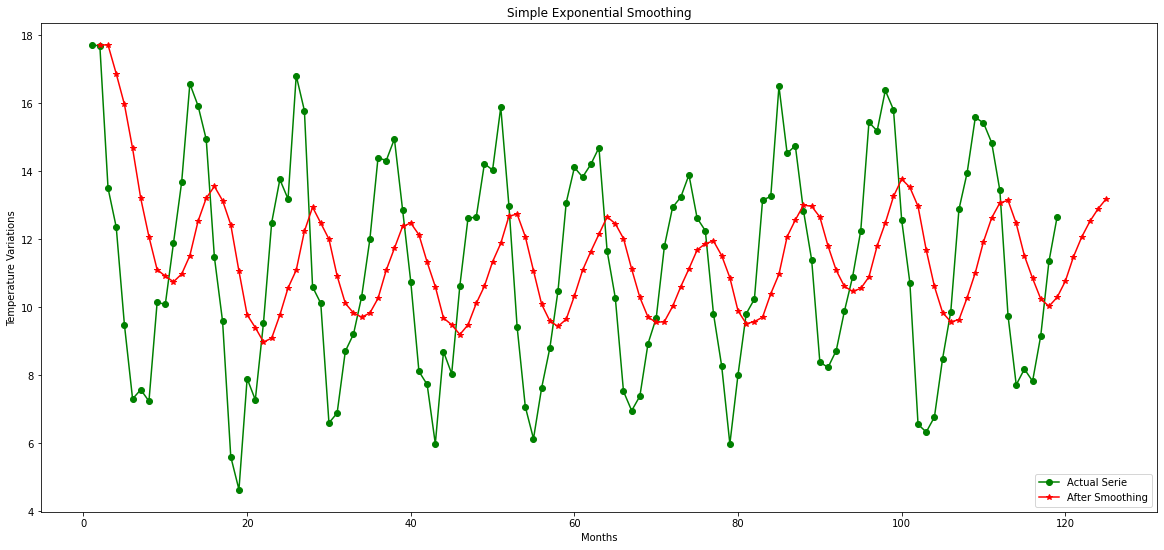

In [53]:
# Simple Exponential Smoothing 
plt.figure(figsize=(20,9))
plt.title('Simple Exponential Smoothing')
plt.plot(single_data.Months.values[:119], single_data.Average_Month_Temp.values[:119], 'go-')
plt.plot(single_data.Months.values[1:], single_data.Forecast.values[1:], 'r*-')
plt.legend(["Actual Serie", "After Smoothing"], loc ="lower right")
plt.xlabel('Months')
plt.ylabel('Temperature Variations')
plt.show()

##### Using predefined Model from sklearn to compare the result

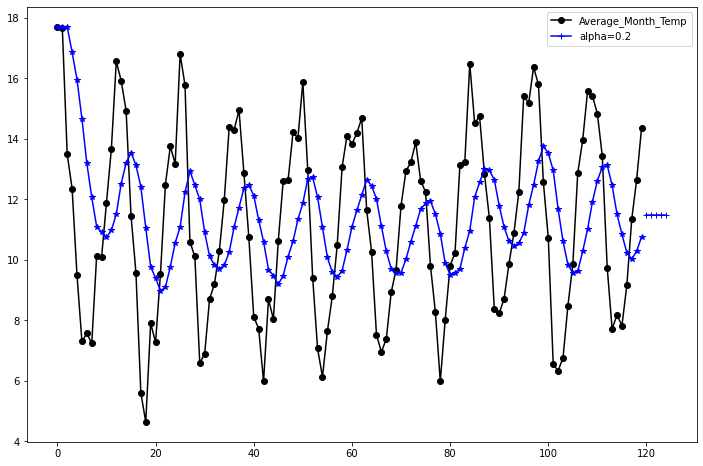

<Figure size 1440x648 with 0 Axes>

In [55]:
from statsmodels.tsa.api import SimpleExpSmoothing
# Single Exponential Smoothing using alpha = 0.2
ins1 = SimpleExpSmoothing(new_data.Average_Month_Temp).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(5).rename('alpha=0.2')

#After creating model we will visualize the plot
ax = new_data.Average_Month_Temp.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2

ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='*', ax=ax, color='blue')
plt.show()

### Double Exponential Smoothing - Holt Method

* The idea behind Double Exponential Smoothing (a.k.a the Holt Method) is exponential smoothing applied to both level and trend. The basic idea is saying if our time series has a trend, we can incorporate that information to do better than just estimating the current level and using that to forecast the future observations. To achieve this, we will introduce two new notations: the current "trend", denoted by  T  (we can think of it as the slope of the time series), as well as the current "level", denoted by  ℓ .


* ℓx=αyx+(1−α)(ℓx−1+Tx−1) ----> Level
* ℓ, level is simply predicted point. But because now it's going to be only part of calculation of the forecast (our forecast is a combination of predicted point and trend), we can no longer refer to it as  y^



* Tx=β(ℓx−ℓx−1)+(1−β)Tx−1 ----> Trend
* The second equation introduces  0<β<1 , the trend coefficient. As with  α , some values of  β  work better than others depending on the series. When  β  is big, we won't give too much weight to the past trends when estimating current trend



* y^x+1=ℓx+Tx ----> 1 step forecast
* Similar to exponential smoothing, where we used the first observed value as the first expected value, we can use the first observed trend as the first expected trend, i.e. we'll use the first two points to compute the initial trend, i.e.  (yx−yx−1)/1



In [32]:
# Double Exponential Smoothing parameters
alpha=0.2
beta=0.1

In [33]:
# Copy the original data into new dataset for double Exponential smoothing
double_data = new_data.copy()

level = []
trend = []
# Additive model
des_additive_forecast = []
# Multiplicative model
des_multiple_forecast = []
# Error when using additive model
des_additive_square_error = []
# Erro when using multiplicative model
des_multiple_square_error = []

for i in double_data.index:
    if i == 0:
        level.append(0)
        trend.append(0)
        des_additive_forecast.append(0)
        des_multiple_forecast.append(0)
        des_additive_square_error.append(0)
        des_multiple_square_error.append(0)
    elif i == 1:
        level.append(double_data.Average_Month_Temp.values[0])
        trend.append(double_data.Average_Month_Temp.values[1]-double_data.Average_Month_Temp.values[0])
        des_additive_forecast.append(0)
        des_multiple_forecast.append(0)
        des_additive_square_error.append(0)
        des_multiple_square_error.append(0)
    else:
        temp = level[-1]
        level.append(alpha * double_data.Average_Month_Temp.values[i] + (1-alpha) * (temp - trend[-1]))
        temp1= trend[-1]
        trend.append(beta * (level[i] - level[i-1]) + (1 - beta) * temp1)
        des_additive_forecast.append(level[i] + trend[i])
        des_multiple_forecast.append(level[i] * trend[i])
        des_additive_square_error.append(np.power((des_additive_forecast[i]-double_data.Average_Month_Temp.values[i]), 2))
        des_multiple_square_error.append(np.power((des_multiple_forecast[i]-double_data.Average_Month_Temp.values[i]), 2))
        
# Add Level, Trend, AdditiveForecast, AdditiveError, MutiplicativeForcast, MultiplicativeError to the dataFrame
double_data['Level'] = level
double_data['Trend'] = trend
double_data['AdditiveForecast'] = des_additive_forecast
double_data['AdditiveError'] = des_additive_square_error
double_data['MutiplicativeForcast'] = des_multiple_forecast
double_data['MultiplicativeError'] = des_additive_square_error

double_data.head()

,Months,Average_Month_Temp,Level,Trend,AdditiveForecast,AdditiveError,MutiplicativeForcast,MultiplicativeError
0,1,17.712903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,17.678571,17.712903,-0.034332,0.000000,0.000000,0.000000,0.000000
2,3,13.500000,16.897788,-0.112410,16.785378,10.793708,-1.899483,10.793708
3,4,12.356667,16.079492,-0.182999,15.896493,12.530371,-2.942527,12.530371
4,5,9.490323,14.908057,-0.281842,14.626215,26.377387,-4.201722,26.377387


In [34]:
double_data.MutiplicativeForcast

0      0.000000
1      0.000000
2     -1.899483
3     -2.942527
4     -4.201722
         ...   
115   -1.426031
116   -1.367484
117   -0.901541
118   -0.293642
119    0.536952
Name: MutiplicativeForcast, Length: 120, dtype: float64

In [35]:
# Additive Root Square Mean Error
print(f'Root Square Mean Error made using Additive model : {np.sqrt(double_data.AdditiveError.mean())}')
# Multiplicative Root Square Mean Error
print(f'Root Square Mean Error made using Additive model : {np.sqrt(double_data.MultiplicativeError.mean())}')

Root Square Mean Error made using Additive model : 2.463954245104217
Root Square Mean Error made using Additive model : 2.463954245104217


##### Forecasting the next year Data

In [36]:
# Assume k = 4, let find the forecast values for the next year.
k = 4
des_additive_values = []
des_multiple_values = []
for i in range(1,k+1):
    des_additive_values.append(level[-1] + i * trend[-1])
    des_multiple_values.append(level[-1] + trend[-1]**i)

# Add the forecast values for the additive model   
des_additive_forecast.extend(des_additive_values)
# Add the forecast values for the multiplicative model   
des_multiple_forecast.extend(des_multiple_values)

df = {'Months':np.arange(121, 125),
      'Average_Month_Temp':np.zeros(k)}
frame = pd.DataFrame(df, index=range(1,5))
double_data = pd.concat([double_data, frame])
double_data['AdditiveForecast'] = des_additive_forecast
double_data['MutiplicativeForcast'] = des_multiple_forecast

In [37]:
double_data

,Months,Average_Month_Temp,Level,Trend,AdditiveForecast,AdditiveError,MutiplicativeForcast,MultiplicativeError
0,1,17.712903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,17.678571,17.712903,-0.034332,0.000000,0.000000,0.000000,0.000000
2,3,13.500000,16.897788,-0.112410,16.785378,10.793708,-1.899483,10.793708
3,4,12.356667,16.079492,-0.182999,15.896493,12.530371,-2.942527,12.530371
4,5,9.490323,14.908057,-0.281842,14.626215,26.377387,-4.201722,26.377387
...,...,...,...,...,...,...,...,...
119,120,14.367742,11.670844,0.046008,11.716852,7.027217,0.536952,7.027217
1,121,0.000000,NaN,NaN,11.716852,NaN,11.716852,NaN
2,122,0.000000,NaN,NaN,11.762860,NaN,11.672961,NaN
3,123,0.000000,NaN,NaN,11.808868,NaN,11.670941,NaN


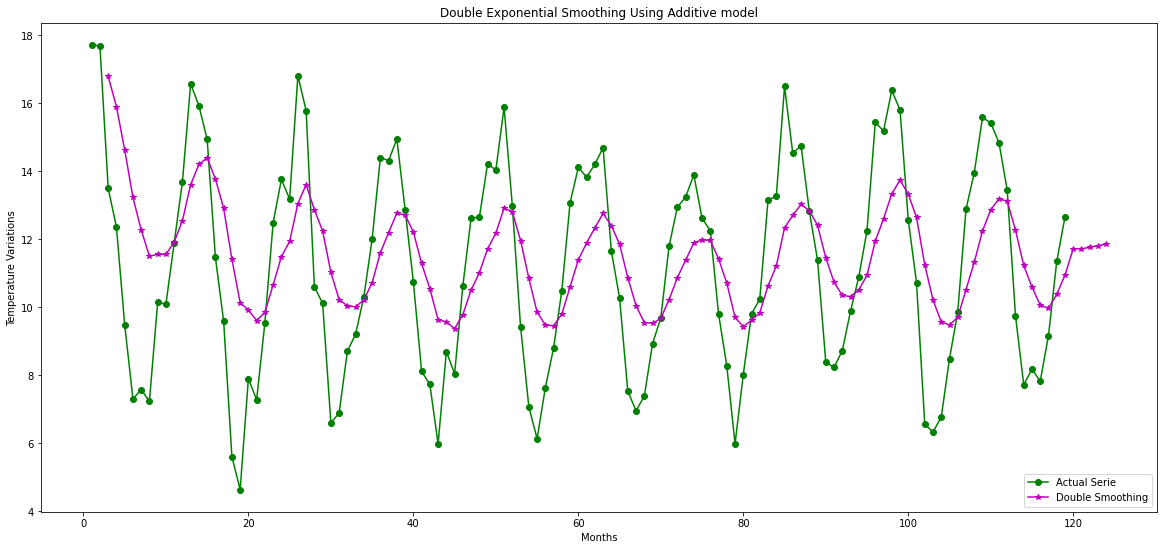

In [52]:
# Double Exponential Smoothing Ulring Additive model

plt.figure(figsize=(20,9))
plt.title('Double Exponential Smoothing Using Additive model')

plt.plot(double_data.Months.values[:119], double_data.Average_Month_Temp.values[:119], 'go-')
plt.plot(double_data.Months.values[2:], double_data.AdditiveForecast.values[2:], 'm*-')

plt.legend(["Actual Serie", "Double Smoothing"], loc ="lower right")
plt.xlabel('Months')
plt.ylabel('Temperature Variations')
plt.show()

### Triple Exponential Smoothing - Holt-Winters Method

* The idea behind triple exponential smoothing (a.k.a Holt-Winters Method) is to apply exponential smoothing to a third component - seasonality,  S . This means we should not be using this method if our time series is not expected to have seasonality.

* ℓx=α(yx−Sx−L)+(1−α)(ℓx−1+Tx−1) ---> level


* Tx=β(ℓx−ℓx−1)+(1−β)Tx−1 ---> Trend


* Sx=γ(yx−ℓx)+(1−γ)sx−L ---> seasonal


* y^x+m=ℓx+mTx+Sx−L+1+ (m-1) mod L ---> forecast

* Season length is the number of data points after which a new season begins. We will use  L  to denote season length.


* We now have a third coefficient,  0<γ<1 , which is the smoothing factor for the seasonal component.


*  The index for the forecast,  y^x+m , is  x+m  where  m  can be any integer. Meaning we can forecast any number of points into the future while accounting for previous value, trend and seasonality.




* The index of the seasonal component of the forecast  Sx−L+1+(m−1)modL  may appear a little mind boggling, but as we'll soon see in the implementation, this is essentially offsetting into our observed data's list of seasonal components. e.g. if we are forecasting the 3rd point into the season, and we are 45 seasons into the future, we cannot use seasonal components from the 44th season in the future since that season is also generated by our forecasting procedure, we must use the last set of seasonal components from observed points, or from "the past" if you will.

In [42]:
# Triple Exponential Smoothing parametes
alpha = 0.2
beta = 0.1
gamma = 0.4

# Asume we have yearly seasonality
M = 4 
triple_data = new_data.copy()


level = []
trend = []
seasonal = []
forecast = []

for i in range(M):
    seasonal.append(triple_data.Average_Month_Temp[i]/triple_data.Average_Month_Temp.values[:M].mean())
for j in triple_data.index.values[M:]:
    if j == 4:
        temp = triple_data.Average_Month_Temp.values[j-1]
        level.append(alpha * (triple_data.Average_Month_Temp[j] - seasonal[j-M]))
        trend.append(triple_data.Average_Month_Temp.values[j]-(temp))
        seasonal.append(gamma * (triple_data.Average_Month_Temp.values[j]-level[-1]) + (1-gamma)*seasonal[j-M])
    else:
        level.append(alpha * (triple_data.Average_Month_Temp[j] - seasonal[j-M]) + (1 - alpha) * (level[-1] + trend[-1]))
        trend.append(beta * (level[-1] - level[-2]) + (1-beta)*trend[-1])
        seasonal.append(gamma * (triple_data.Average_Month_Temp.values[j]-level[-1]) + (1-gamma)*seasonal[j-M])
        forecast.append((level[j-M-1] + trend[j-M-1])*seasonal[j-M])
           

#Standarize the values obtain for the forcasting   
     
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(4.641935483870967, 18))
names = pd.DataFrame(forecast)
forecast_value = scaler.fit_transform(names)

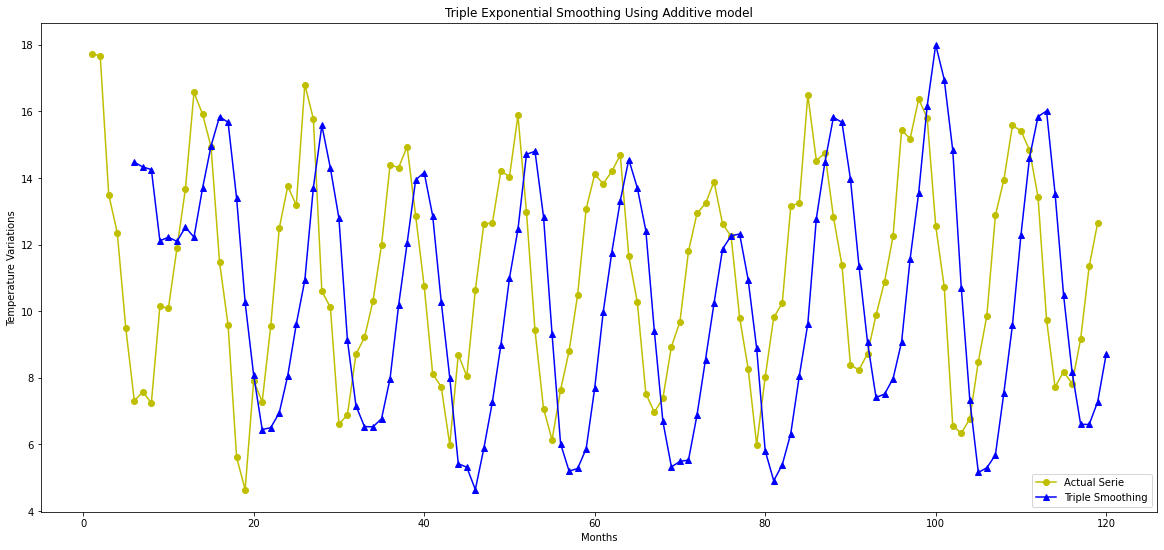

In [51]:
plt.figure(figsize=(20,9))
plt.title('Triple Exponential Smoothing Using Additive model')

plt.plot(triple_data.Months.values[:119], triple_data.Average_Month_Temp.values[:119], 'yo-')
plt.plot(triple_data.Months.values[5:], forecast_value, 'b^-')

plt.legend(["Actual Serie", "Triple Smoothing"], loc ="lower right")
plt.xlabel('Months')
plt.ylabel('Temperature Variations')
plt.show()

##### All The three graphs combined

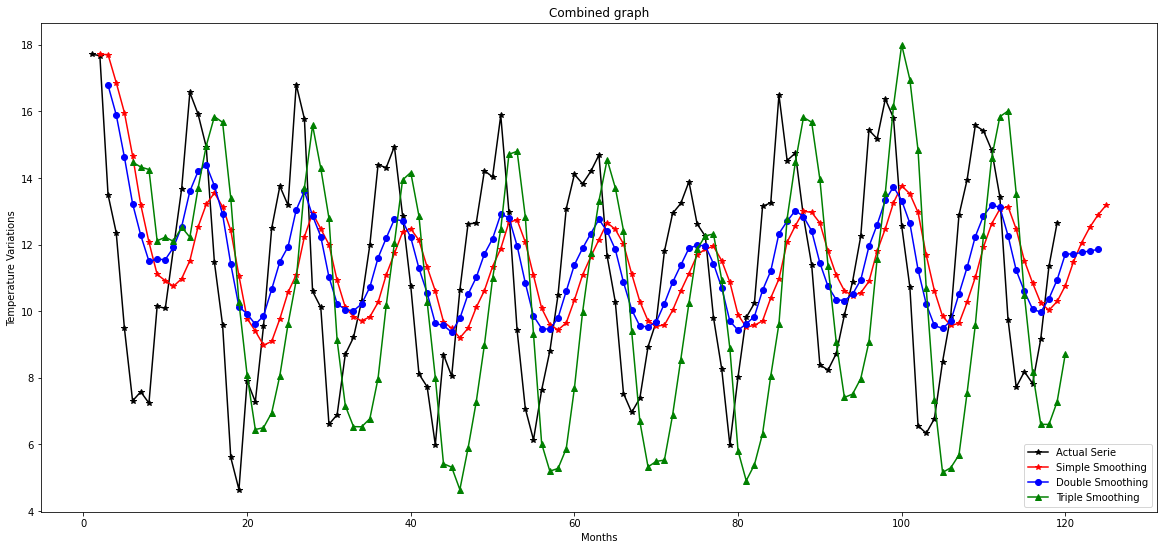

In [50]:
plt.figure(figsize=(20,9))
plt.title('Combined graph')

plt.plot(single_data.Months.values[:119], single_data.Average_Month_Temp.values[:119], color='black', marker='*')
plt.plot(single_data.Months.values[1:], single_data.Forecast.values[1:], 'r*-')
plt.plot(double_data.Months.values[2:], double_data.AdditiveForecast.values[2:], 'bo-')
plt.plot(triple_data.Months.values[5:], forecast_value, 'g^-')

plt.legend(["Actual Serie", "Simple Smoothing", "Double Smoothing", "Triple Smoothing"], loc ="lower right")
plt.xlabel('Months')
plt.ylabel('Temperature Variations')
plt.show()